data loaded successfully...
[epoch 1, iter   200] loss: 1.140
[epoch 1, iter   400] loss: 0.176
[epoch 1, iter   600] loss: 0.118
[epoch 1, iter   800] loss: 0.094
epoch 1: train_acc 97.628, test_acc 97.820
[epoch 2, iter   200] loss: 0.072
[epoch 2, iter   400] loss: 0.068
[epoch 2, iter   600] loss: 0.063
[epoch 2, iter   800] loss: 0.062
epoch 2: train_acc 98.620, test_acc 98.470
[epoch 3, iter   200] loss: 0.051
[epoch 3, iter   400] loss: 0.047
[epoch 3, iter   600] loss: 0.045
[epoch 3, iter   800] loss: 0.042
epoch 3: train_acc 98.965, test_acc 98.810
[epoch 4, iter   200] loss: 0.031
[epoch 4, iter   400] loss: 0.037
[epoch 4, iter   600] loss: 0.039
[epoch 4, iter   800] loss: 0.032
epoch 4: train_acc 99.228, test_acc 98.930
[epoch 5, iter   200] loss: 0.024
[epoch 5, iter   400] loss: 0.028
[epoch 5, iter   600] loss: 0.026
[epoch 5, iter   800] loss: 0.028
epoch 5: train_acc 99.493, test_acc 99.010
[epoch 6, iter   200] loss: 0.022
[epoch 6, iter   400] loss: 0.024
[epoch 6,

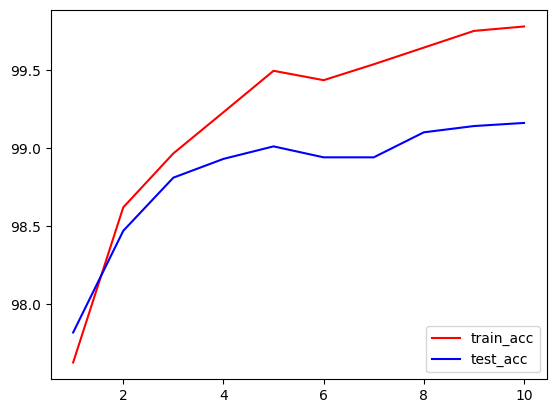

In [4]:
# EE569 Homework Assignment #5 Sample Code
# requirements: python3 + pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision as tv
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import math
import os

train_batch_size=64
test_batch_size=1000

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,6,5,stride=1,padding=2)
        self.conv2=nn.Conv2d(6,16,5,stride=1,padding=0)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,self.num_flat_features(x))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    def num_flat_features(self,x):
        #x is a 4D tensor
        x_size=x.size()[1:]
        num=1
        for n in x_size:
            num*=n
        return num

def load_data():
    transform=transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])
    train_set=tv.datasets.MNIST(
        root='./data',
        train=True,
        download=True,
        transform=transform
        )
    train_loader=torch.utils.data.DataLoader(
        train_set,
        batch_size=train_batch_size,
        shuffle=True,
        num_workers=2)
    test_set=tv.datasets.MNIST(
        root='./data',
        train=False,
        download=True,
        transform=transform
        )
    test_loader=torch.utils.data.DataLoader(
        test_set,
        batch_size=test_batch_size,
        shuffle=False,
        num_workers=2)
    print("data loaded successfully...")
    return train_loader,test_loader

def accuracy(model,x,neg=False):
    with torch.no_grad():
        correct=0
        total=0
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        for data in x:
            images,labels=data
            if neg:
              images=-images
            images,labels=images, labels
            outputs=model(images)
            _,predicted=torch.max(outputs.data,1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()

        return (100 * correct / total)

def train(train_loader, test_loader, model, criterion, optimizer,epoch):
    model.train()
    running_loss=0
    for i,data in enumerate(train_loader,0):
        inputs,labels=data
        inputs,labels=inputs, labels
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss+=loss.item()
        if i%200==199:
            print("[epoch %d, iter %5d] loss: %.3f"%(epoch+1,i+1,running_loss/200))
            running_loss=0.0
    train_acc=accuracy(model,train_loader)
    test_acc=accuracy(model,test_loader)
    print("epoch %d: train_acc %.3f, test_acc %.3f"%(epoch+1,train_acc,test_acc))
    return train_acc,test_acc

def display(train_acc,test_acc):
    fig,ax=plt.subplots()
    ax.plot(range(1,len(train_acc)+1),train_acc,color='r',label='train_acc')
    ax.plot(range(1,len(test_acc)+1),test_acc,color='b',label='test_acc')
    ax.legend(loc='lower right')
    plt.show()

if __name__ == '__main__':
    # input MNIST
    train_loader,test_loader=load_data()
    # new model
    net=Net()

    # training
    learning_rate=0.01
    momentum=0.9
    max_epoch=10
    criterion=nn.CrossEntropyLoss()
    optimizer=optim.SGD(net.parameters(),lr=learning_rate,momentum=momentum)

    train_acc=[]
    test_acc=[]
    for epoch in range(max_epoch):
        train_acc_t,test_acc_t=train(train_loader, test_loader, net, criterion, optimizer,epoch)
        train_acc.append(train_acc_t)
        test_acc.append(test_acc_t)

    display(train_acc,test_acc)

